In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from akita_utils.format_io import h5_to_df
from akita_utils.analysis import (average_stat_over_targets, organize_df_by_target, average_stat_over_backgrounds)

In [3]:
# for all directories with results:
# python collect_jobs_and_clean.py /scratch2/smaruj/<directory> -g -l -n

In [4]:
stat_names = ["SCD", "INS-16", "INS-64"]

In [5]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_experiment"

In [6]:
# reading h5 files to dataframes
df_m0 = h5_to_df(data_dir+"/model_0.h5", stat_names, average=False) 
df_m1 = h5_to_df(data_dir+"/model_1.h5", stat_names, average=False) 
df_m2 = h5_to_df(data_dir+"/model_2.h5", stat_names, average=False) 
df_m3 = h5_to_df(data_dir+"/model_3.h5", stat_names, average=False) 
df_m4 = h5_to_df(data_dir+"/model_4.h5", stat_names, average=False) 
df_m5 = h5_to_df(data_dir+"/model_5.h5", stat_names, average=False) 
df_m6 = h5_to_df(data_dir+"/model_6.h5", stat_names, average=False) 
df_m7 = h5_to_df(data_dir+"/model_7.h5", stat_names, average=False) 

In [7]:
# averaging over targets
df_m0_tg = average_stat_over_targets(df_m0, model_index=0, head_index=1)
df_m1_tg = average_stat_over_targets(df_m1, model_index=1, head_index=1)
df_m2_tg = average_stat_over_targets(df_m2, model_index=2, head_index=1)
df_m3_tg = average_stat_over_targets(df_m3, model_index=3, head_index=1)
df_m4_tg = average_stat_over_targets(df_m4, model_index=4, head_index=1)
df_m5_tg = average_stat_over_targets(df_m5, model_index=5, head_index=1)
df_m6_tg = average_stat_over_targets(df_m6, model_index=6, head_index=1)
df_m7_tg = average_stat_over_targets(df_m7, model_index=7, head_index=1)

In [8]:
# averaging over backgrounds
df_m0_tgbg = average_stat_over_backgrounds(df_m0_tg, model_index=0, head_index=1)
df_m1_tgbg = average_stat_over_backgrounds(df_m1_tg, model_index=1, head_index=1)
df_m2_tgbg = average_stat_over_backgrounds(df_m2_tg, model_index=2, head_index=1)
df_m3_tgbg = average_stat_over_backgrounds(df_m3_tg, model_index=3, head_index=1)
df_m4_tgbg = average_stat_over_backgrounds(df_m4_tg, model_index=4, head_index=1)
df_m5_tgbg = average_stat_over_backgrounds(df_m5_tg, model_index=5, head_index=1)
df_m6_tgbg = average_stat_over_backgrounds(df_m6_tg, model_index=6, head_index=1)
df_m7_tgbg = average_stat_over_backgrounds(df_m7_tg, model_index=7, head_index=1)

In [11]:
SCD_collected = pd.concat([df_m0_tgbg["SCD_m0"], df_m1_tgbg["SCD_m1"], df_m2_tgbg["SCD_m2"], df_m3_tgbg["SCD_m3"], df_m4_tgbg["SCD_m4"], df_m5_tgbg["SCD_m5"], df_m6_tgbg["SCD_m6"], df_m7_tgbg["SCD_m7"]], axis=1)

## Correlations between models

Text(0, 0.5, 'aveSCD model 1')

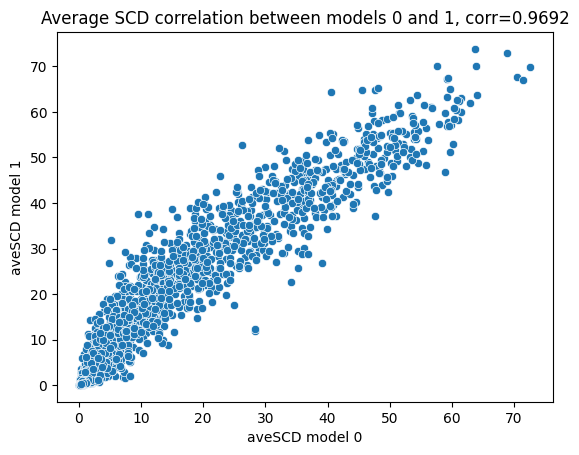

In [13]:
sns.scatterplot(x=df_m0_tgbg["SCD_m0"], y=df_m1_tgbg["SCD_m1"])
m0_m1_corr = round(stats.pearsonr(df_m0_tgbg["SCD_m0"], df_m1_tgbg["SCD_m1"]).statistic, 4)
plt.title(f"Average SCD correlation between models 0 and 1, corr={m0_m1_corr}")
plt.xlabel("aveSCD model 0")
plt.ylabel("aveSCD model 1")

Text(0.5, 0.98, 'Correlations of SCD between models')

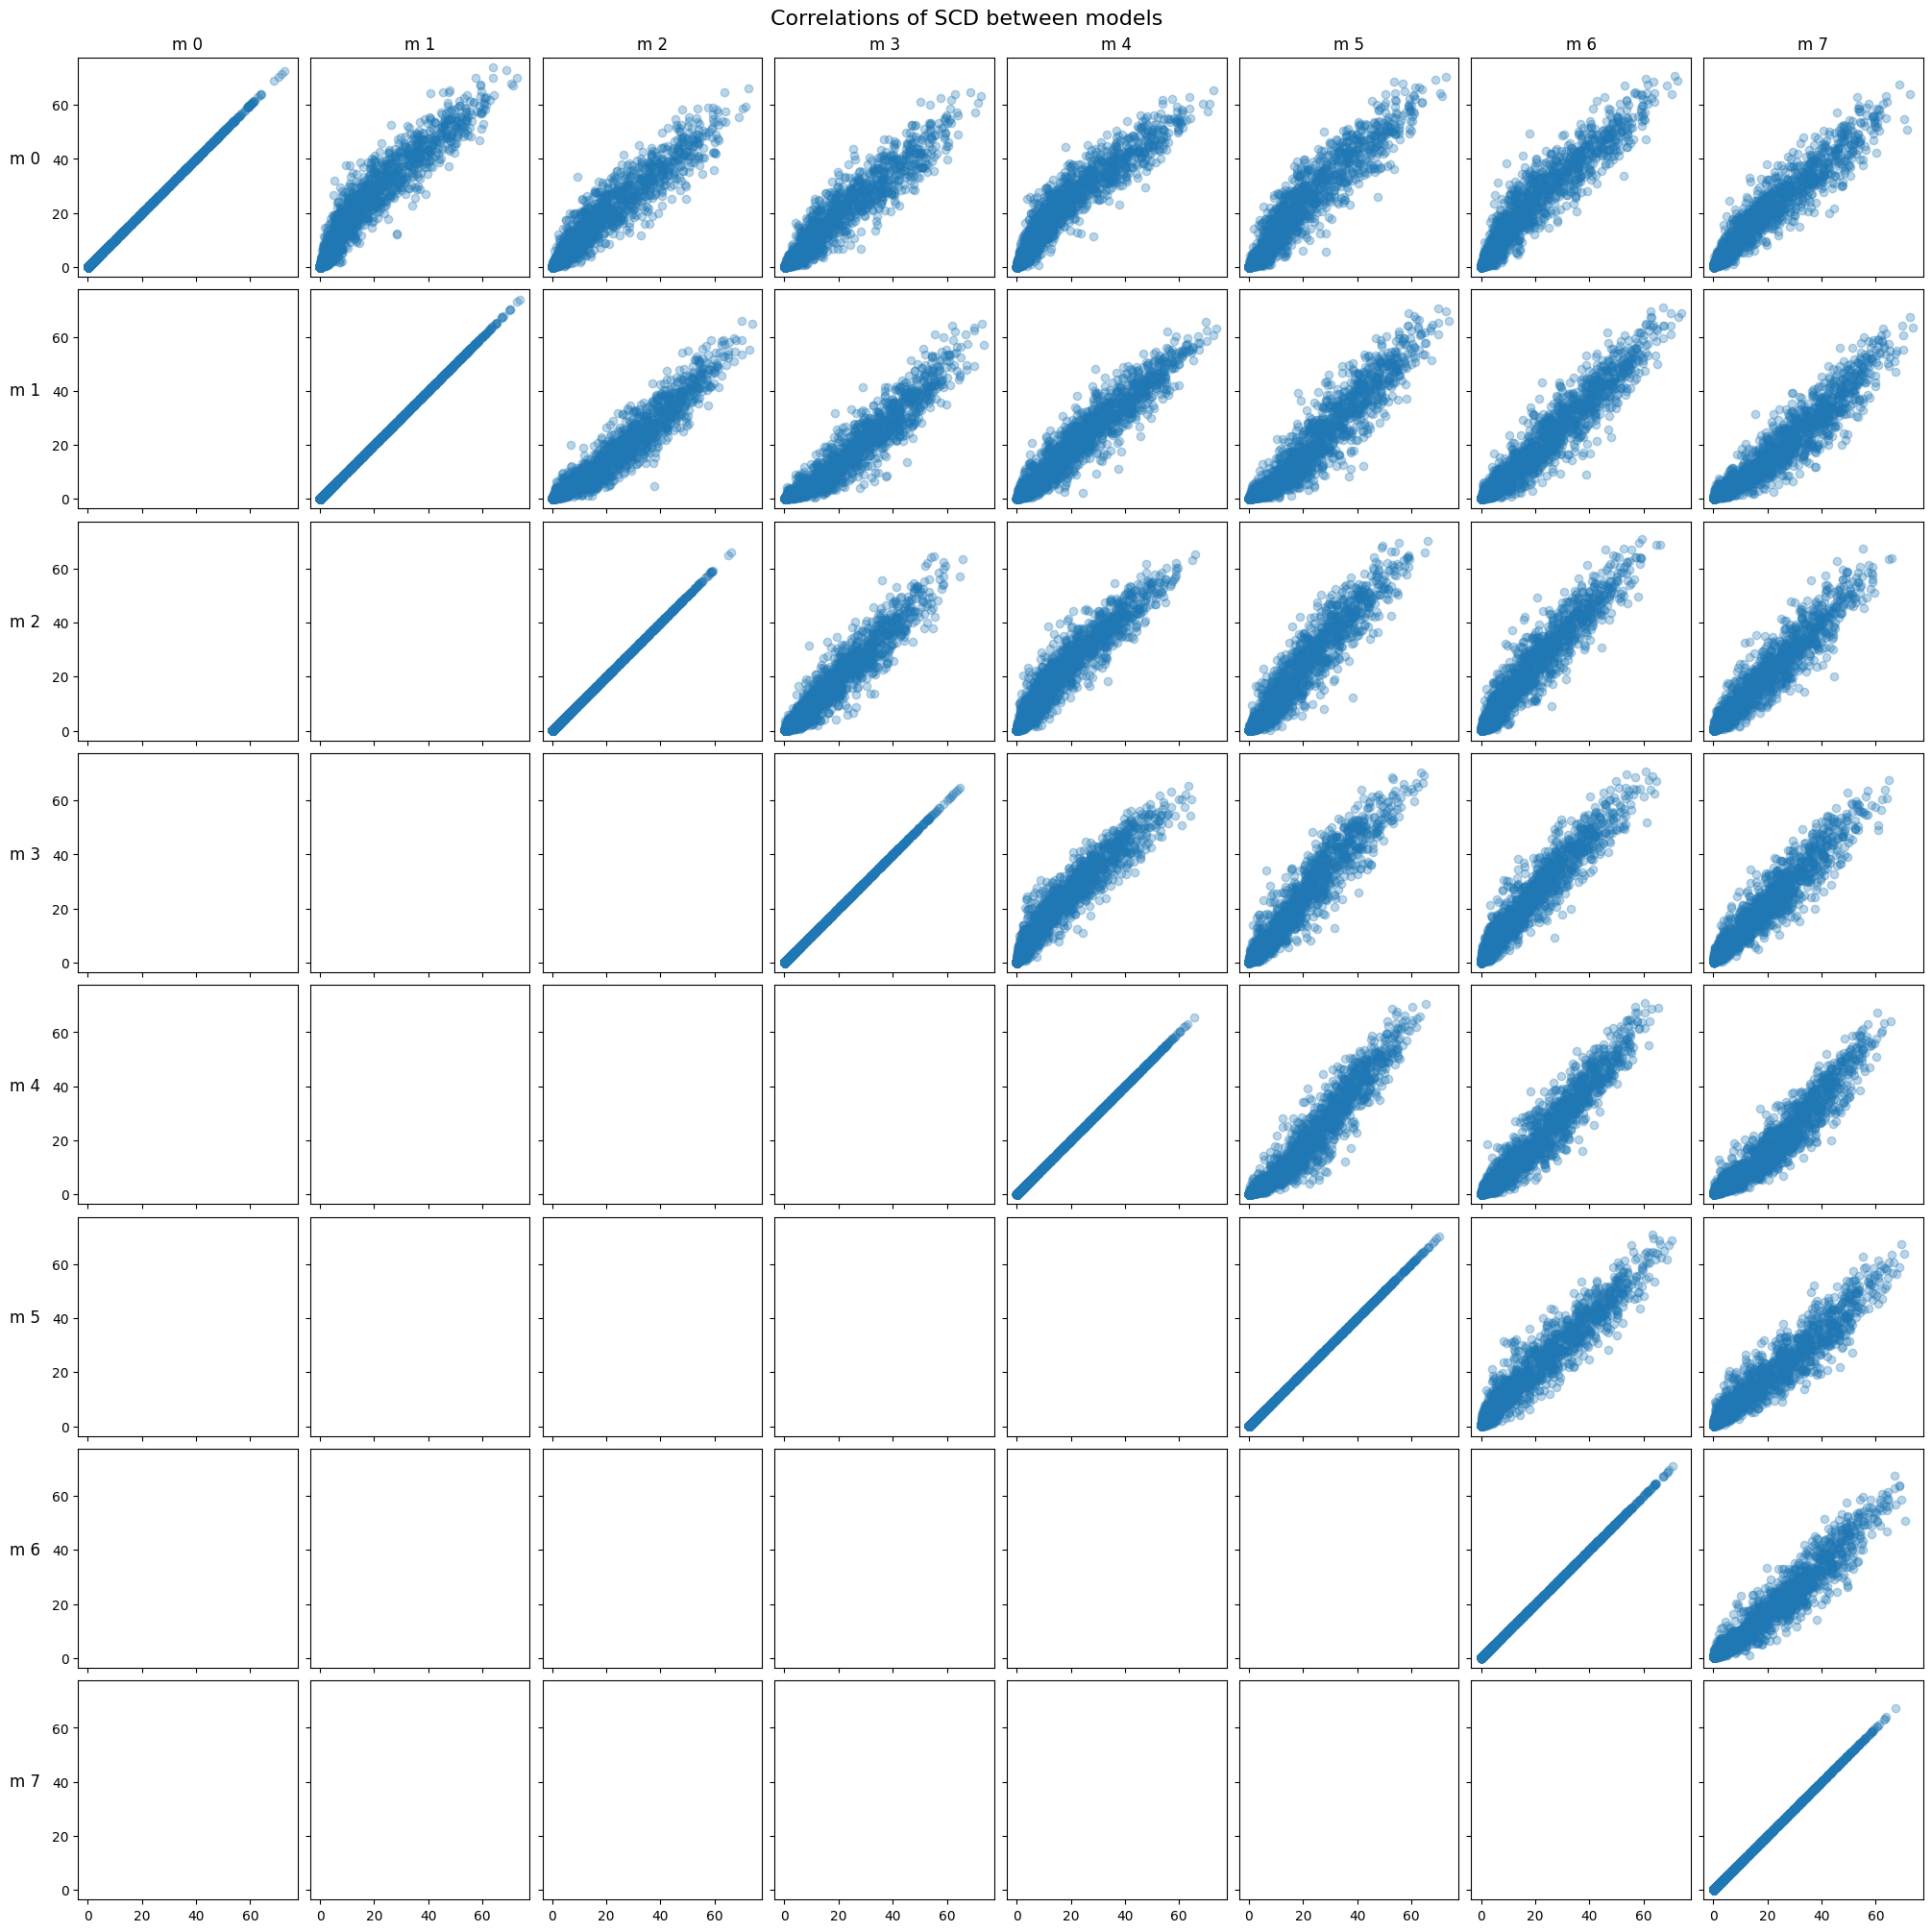

In [15]:
num_models = 8

SCD_corr_summary = np.zeros((num_models,num_models))

fig, axs = plt.subplots(num_models, num_models, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for model_index_x in range(num_models):
    for model_index_y in range(num_models):
        if (model_index_y >= model_index_x):
            
            stat_x = np.array(SCD_collected[f"SCD_m{model_index_x}"])
            stat_y = np.array(SCD_collected[f"SCD_m{model_index_y}"])
            
            axs[model_index_x, model_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            SCD_corr_summary[model_index_x, model_index_y] = SCD_corr_summary[model_index_y, model_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"m {i}" for i in range(num_models)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations of SCD between models", fontsize=16)

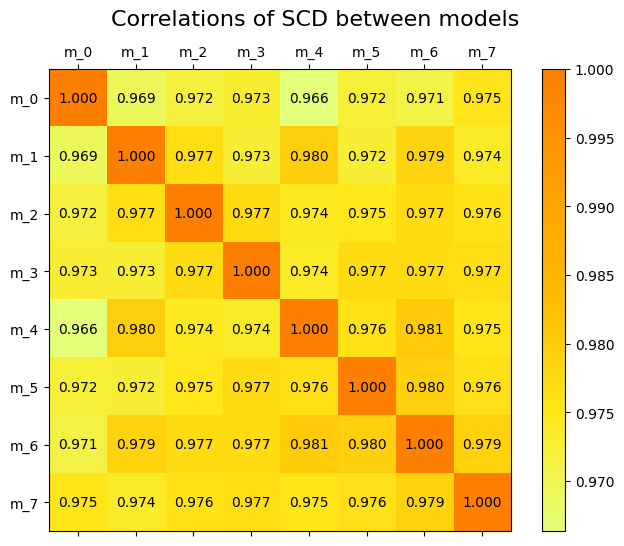

In [16]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(SCD_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"m_{i}" for i in range(num_models)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(SCD_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle("Correlations of SCD between models", fontsize=16)

fig.show()

## Correlations between backgrounds

Text(0, 0.5, 'aveSCD background 1')

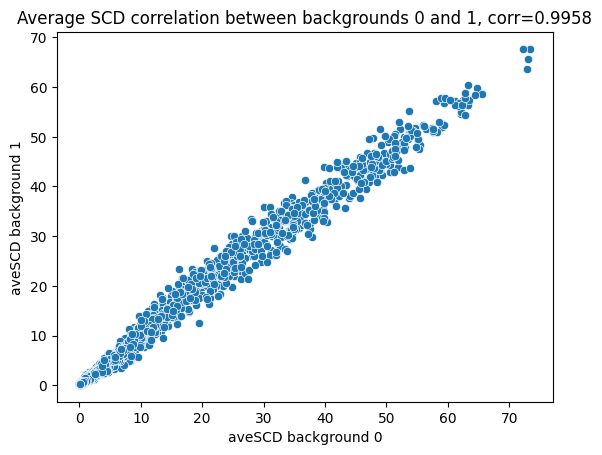

In [17]:
x_bg_index = 0
y_bg_index = 1
sns.scatterplot(x=df_m0_tgbg[f"SCD_bg{x_bg_index}"], y=df_m0_tgbg[f"SCD_bg{y_bg_index}"])
bg0_bg1_corr = round(stats.pearsonr(df_m0_tgbg[f"SCD_bg{x_bg_index}"], df_m0_tgbg[f"SCD_bg{y_bg_index}"]).statistic, 4)
plt.title(f"Average SCD correlation between backgrounds 0 and 1, corr={bg0_bg1_corr}")
plt.xlabel("aveSCD background 0")
plt.ylabel("aveSCD background 1")

Text(0.5, 0.98, 'Correlations of SCD between backgrounds')

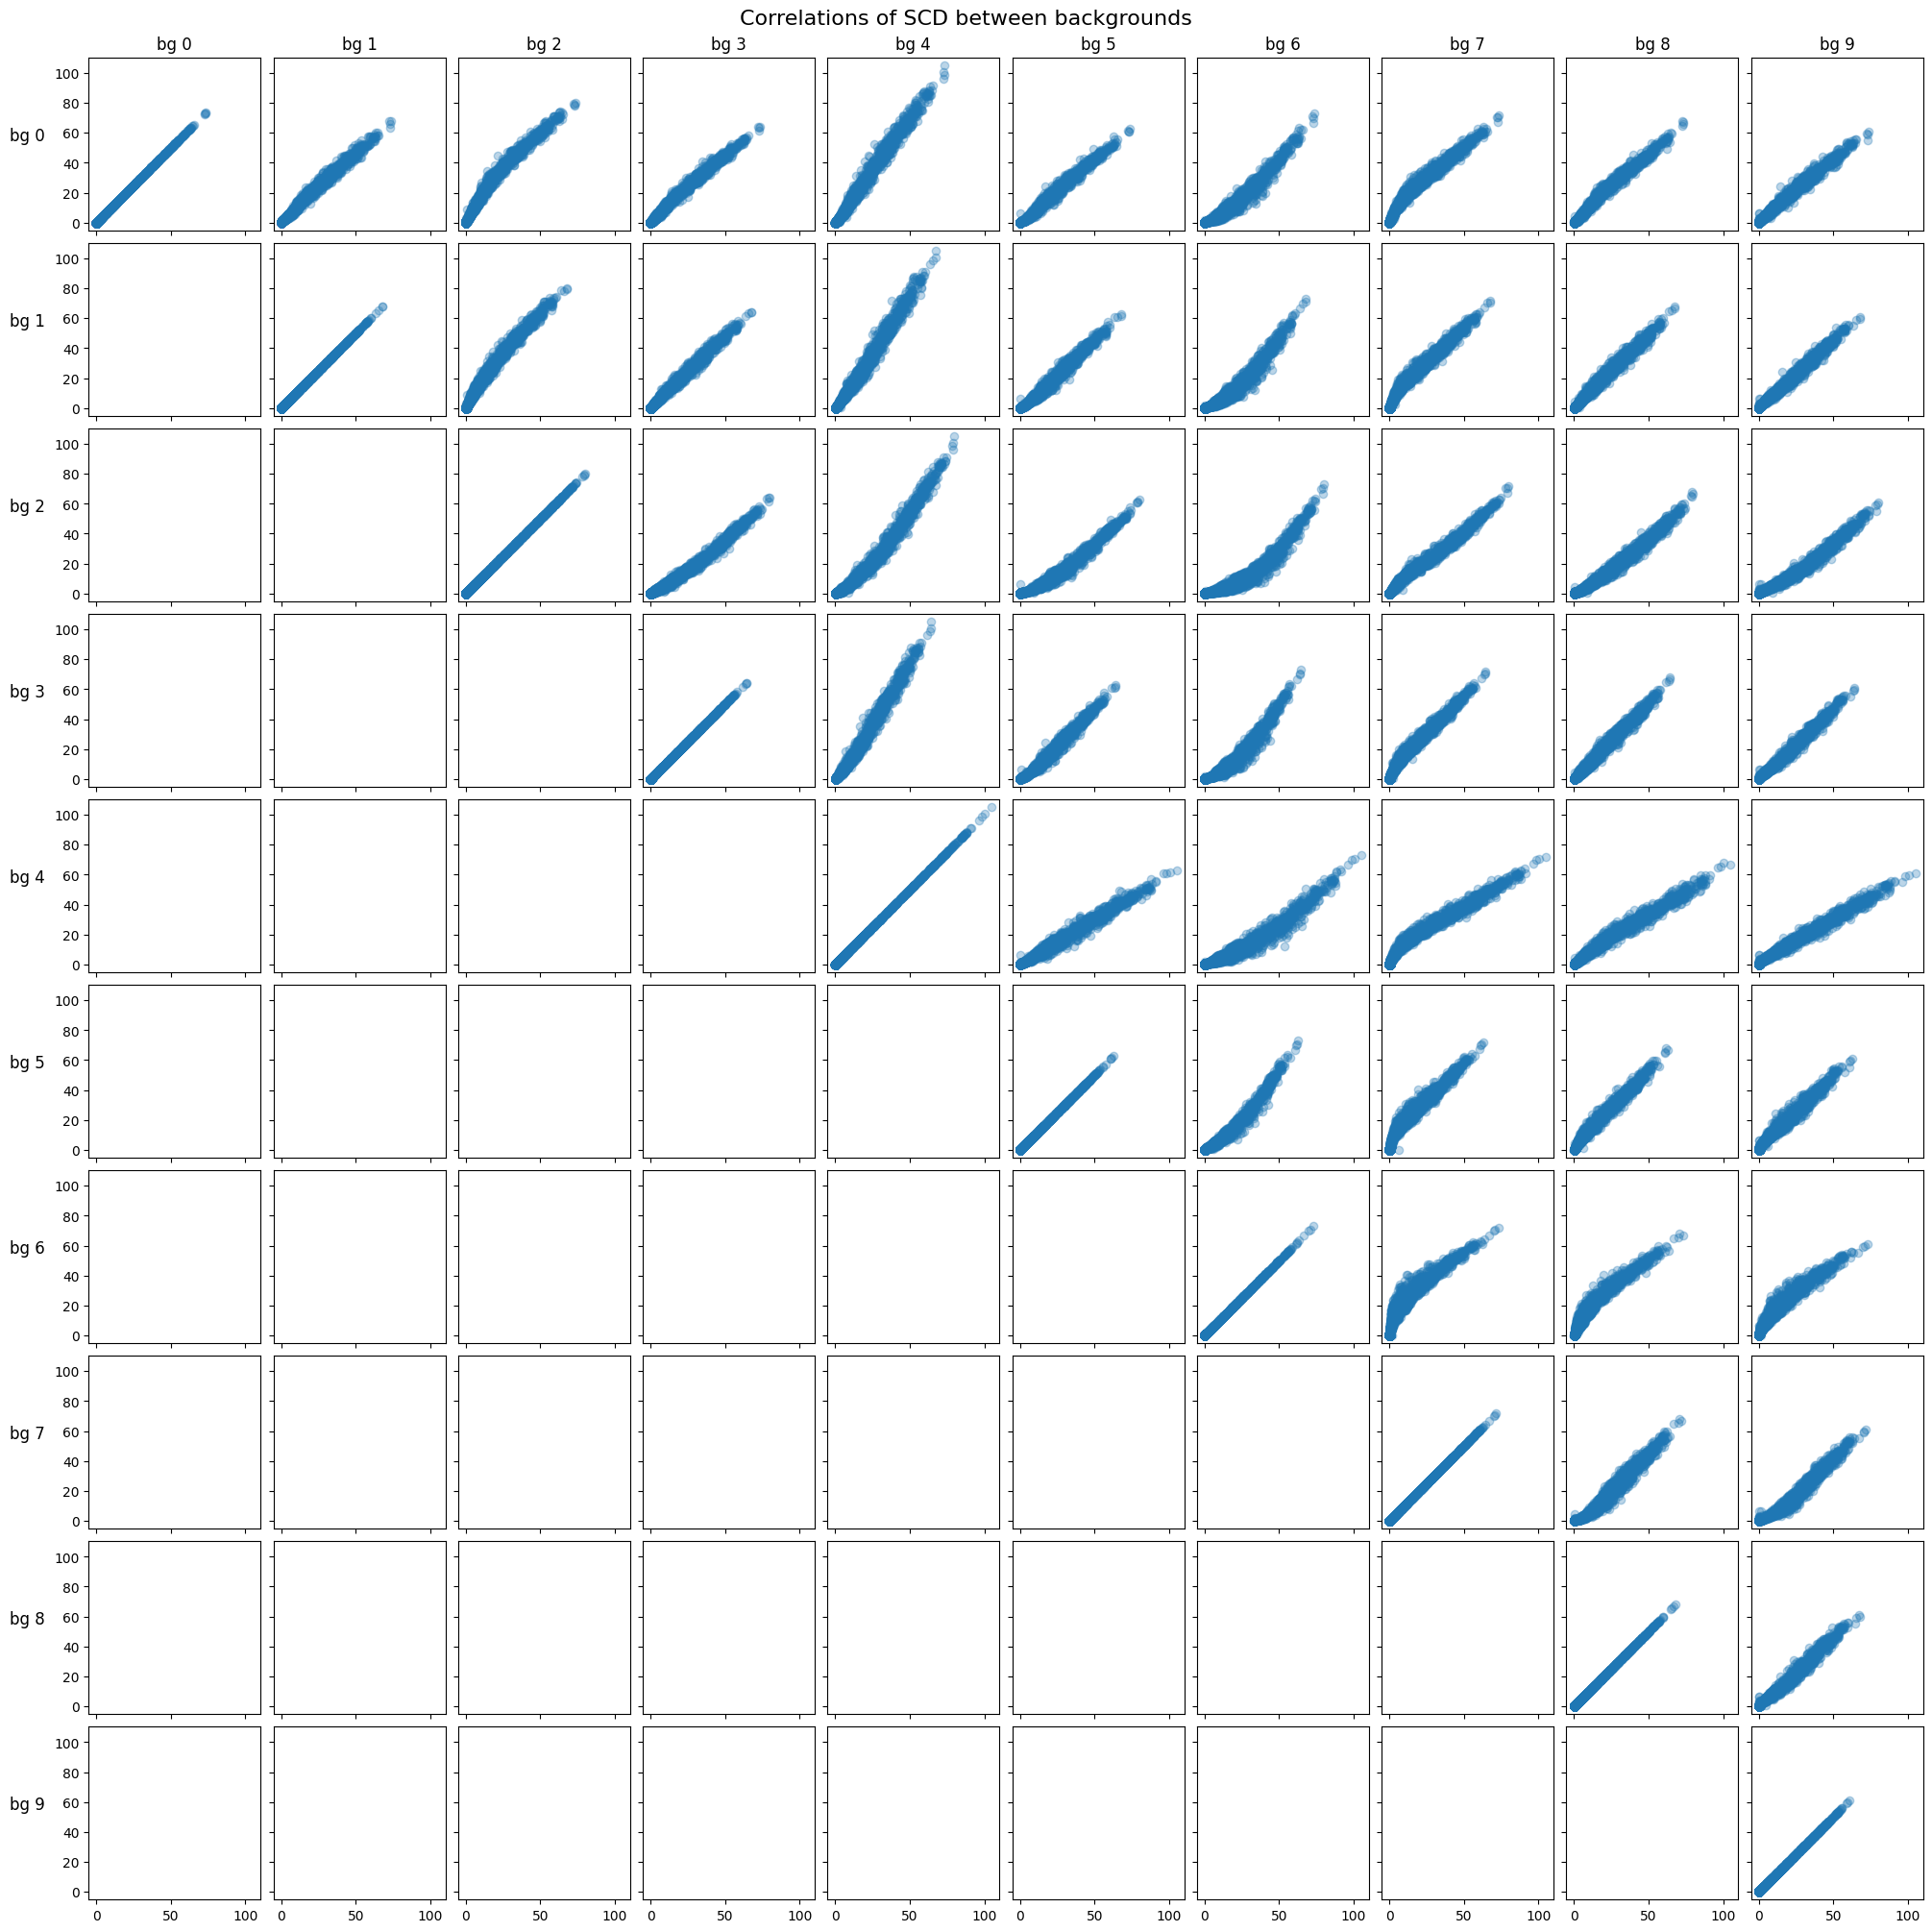

In [18]:
num_backgrounds = 10
model_index = 0
stat = "SCD"
SCD_corr_summary = np.zeros((num_backgrounds, num_backgrounds))

fig, axs = plt.subplots(num_backgrounds, num_backgrounds, figsize=(20, 20), sharex=True, sharey=True, layout="constrained")

for background_index_x in range(num_backgrounds):
    for background_index_y in range(num_backgrounds):
        if (background_index_y >= background_index_x):
            
            stat_x = np.array(df_m0_tgbg[f"{stat}_bg{background_index_x}"])
            stat_y = np.array(df_m0_tgbg[f"{stat}_bg{background_index_y}"])
            
            axs[background_index_x, background_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            SCD_corr_summary[background_index_x, background_index_y] = SCD_corr_summary[background_index_y, background_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"bg {i}" for i in range(num_backgrounds)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations of SCD between backgrounds", fontsize=16)

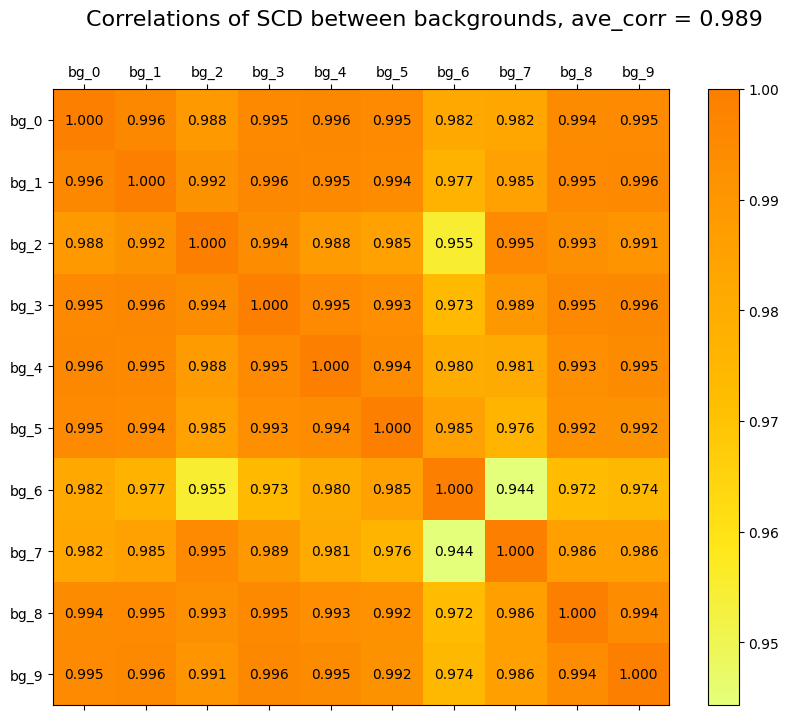

In [19]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111)
cax = ax.matshow(SCD_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"bg_{i}" for i in range(num_backgrounds)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(SCD_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

ave_corr = np.average(SCD_corr_summary)
    
fig.suptitle(f"Correlations of {stat} between backgrounds, ave_corr = {round(ave_corr, 3)}", fontsize=16)

# plt.savefig(f"./plots/insert_inter_bg_model{model_index}_corr.png")

fig.show()

## Correlations between targets for model 0 (background 0)

Text(0.5, 0.98, 'Correlations of SCD between targets (model 0, background 0)')

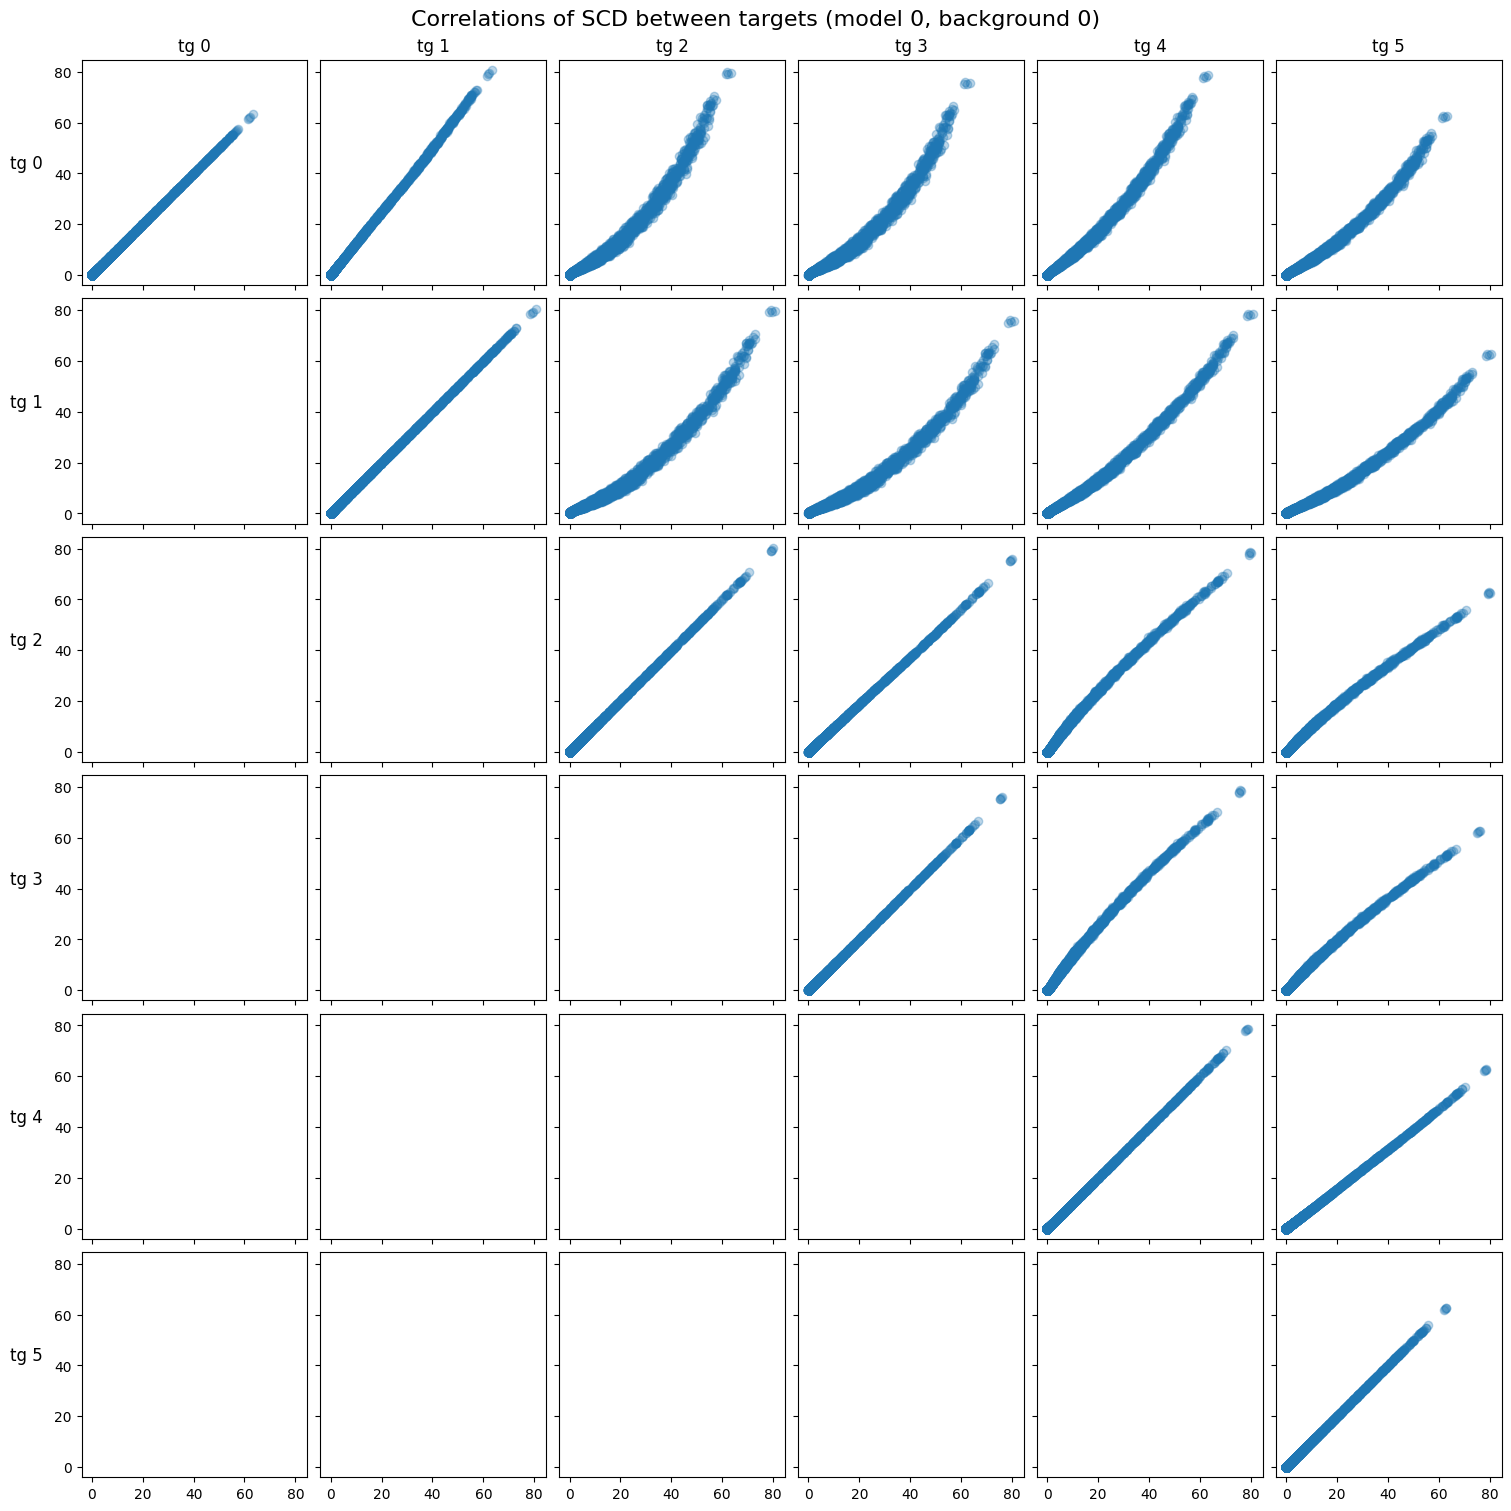

In [23]:
num_targets = 6
model_index = 0
bg_index = 0
stat = "SCD"
SCD_corr_summary = np.zeros((num_targets, num_targets))

fig, axs = plt.subplots(num_targets, num_targets, figsize=(15, 15), sharex=True, sharey=True, layout="constrained")

for target_index_x in range(num_targets):
    for target_index_y in range(num_targets):
        if (target_index_y >= target_index_x):
            
            stat_x = np.array(df_m0[df_m0["background_index"] == bg_index][f"{stat}_h1_m{model_index}_t{target_index_x}"])
            stat_y = np.array(df_m0[df_m0["background_index"] == bg_index][f"{stat}_h1_m{model_index}_t{target_index_y}"])
            
            axs[target_index_x, target_index_y].scatter(x=stat_x, y=stat_y, alpha=0.3)
            
            SCD_corr_summary[target_index_x, target_index_y] = SCD_corr_summary[target_index_y, target_index_x] = stats.pearsonr(stat_x, stat_y).statistic
            
names = [f"tg {i}" for i in range(num_targets)]

for ax, col in zip(axs[0], names):
    ax.set_title(col, size=12)

for ax, row in zip(
    axs[:, 0],
    names,
):
    ax.set_ylabel(row, rotation=0, fontsize=12, labelpad=20)
    
fig.suptitle("Correlations of SCD between targets (model 0, background 0)", fontsize=16)

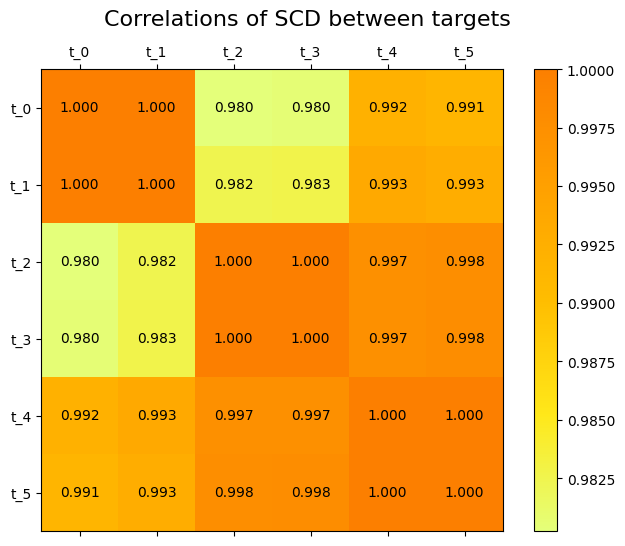

In [24]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111)
cax = ax.matshow(SCD_corr_summary, cmap="Wistia", interpolation='nearest')
fig.colorbar(cax)

names = [f"t_{i}" for i in range(num_targets)]

xaxis = np.arange(len(names))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

for (x, y), value in np.ndenumerate(SCD_corr_summary):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center")

fig.suptitle("Correlations of SCD between targets", fontsize=16)

fig.show()